### Imports


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml

### Read the data


In [4]:
file_path = "../../experiments/hit_ratio_per_cache_size_exp_all_priorities_equal.yaml"

with open(file_path, "r") as file:
    experiments = yaml.safe_load(file)

experiments

{'experiment_1': {'test_type': 'brightkite',
  'test_number': 3,
  'total_buffer_sizes': [{'buffer_size_1': 50,
    'solutions': [{'solution_name': '2Q',
      'fault_score': 0.04843304738235586,
      'hit_score': 0.0732223011596542,
      'solution_hit_ratio_per_tenant': [{'tenant_1': 0.2671428571428571},
       {'tenant_2': 0.21714285714285714},
       {'tenant_3': 0.5785714285714286},
       {'tenant_4': 0.6295238095238095},
       {'tenant_5': 0.5166666666666667}]},
     {'solution_name': 'Belady',
      'fault_score': 0,
      'hit_score': 0,
      'solution_hit_ratio_per_tenant': [{'tenant_1': 0.3719047619047619},
       {'tenant_2': 0.27285714285714285},
       {'tenant_3': 0.63},
       {'tenant_4': 0.770952380952381},
       {'tenant_5': 0.5995238095238096}]},
     {'solution_name': 'LFU',
      'fault_score': 0.05889086421073011,
      'hit_score': 0.08826158619596441,
      'solution_hit_ratio_per_tenant': [{'tenant_1': 0.2866666666666667},
       {'tenant_2': 0.19476190476

### Create a dataframe with data needed for plot of hit ratio per tenant


In [5]:
data_rows = []

for experiment, details in experiments.items():
    count = 0
    for buffer in details["total_buffer_sizes"]:
        count += 1
        buffer_size = buffer[f"buffer_size_{count}"]
        for solution in buffer["solutions"]:
            for tenant_hit_ratio in solution["solution_hit_ratio_per_tenant"]:
                for tenant, hit_ratio in tenant_hit_ratio.items():
                    data_rows.append(
                        {
                            "Experiment": experiment,
                            "Buffer Size": buffer_size,
                            "Solution Name": solution["solution_name"],
                            "Tenant": tenant,
                            "Hit Ratio": hit_ratio,
                        }
                    )

df = pd.DataFrame(data_rows)
df.head()

,Experiment,Buffer Size,Solution Name,Tenant,Hit Ratio
0,experiment_1,50,2Q,tenant_1,0.267143
1,experiment_1,50,2Q,tenant_2,0.217143
2,experiment_1,50,2Q,tenant_3,0.578571
3,experiment_1,50,2Q,tenant_4,0.629524
4,experiment_1,50,2Q,tenant_5,0.516667


#### Method to plot hit ratio of each solution per total buffer size of a tenant


In [8]:
def plot_hit_ratio_by_buffer_size_subplot(
    ax, df, experiment, tenant, experiment_name, tenant_name
):
    """
    Modifies the plotting function to work with subplots.

    Parameters:
    - ax: The axes object to draw the plot onto.
    - df: DataFrame containing the data.
    - experiment: The experiment ID as a string.
    - tenant: The tenant ID as a string.
    """
    filtered_df = df[(df["Experiment"] == experiment) & (df["Tenant"] == tenant)]
    markers = ["o", "s", "X", "^", "D", "P", "H", "<", ">"]

    for solution, marker in zip(filtered_df["Solution Name"].unique(), markers):
        solution_df = filtered_df[filtered_df["Solution Name"] == solution]
        ax.plot(
            solution_df["Buffer Size"],
            solution_df["Hit Ratio"],
            marker=marker,
            label=solution,
        )

    ax.set_title(f"{experiment_name} - {tenant_name}")
    ax.set_xlabel("Total Buffer Size")
    ax.set_ylabel("Hit Ratio")
    ax.legend()
    ax.grid(True)

##### Plot hit ratio per tenant per buffer size of Brightkite Experiment


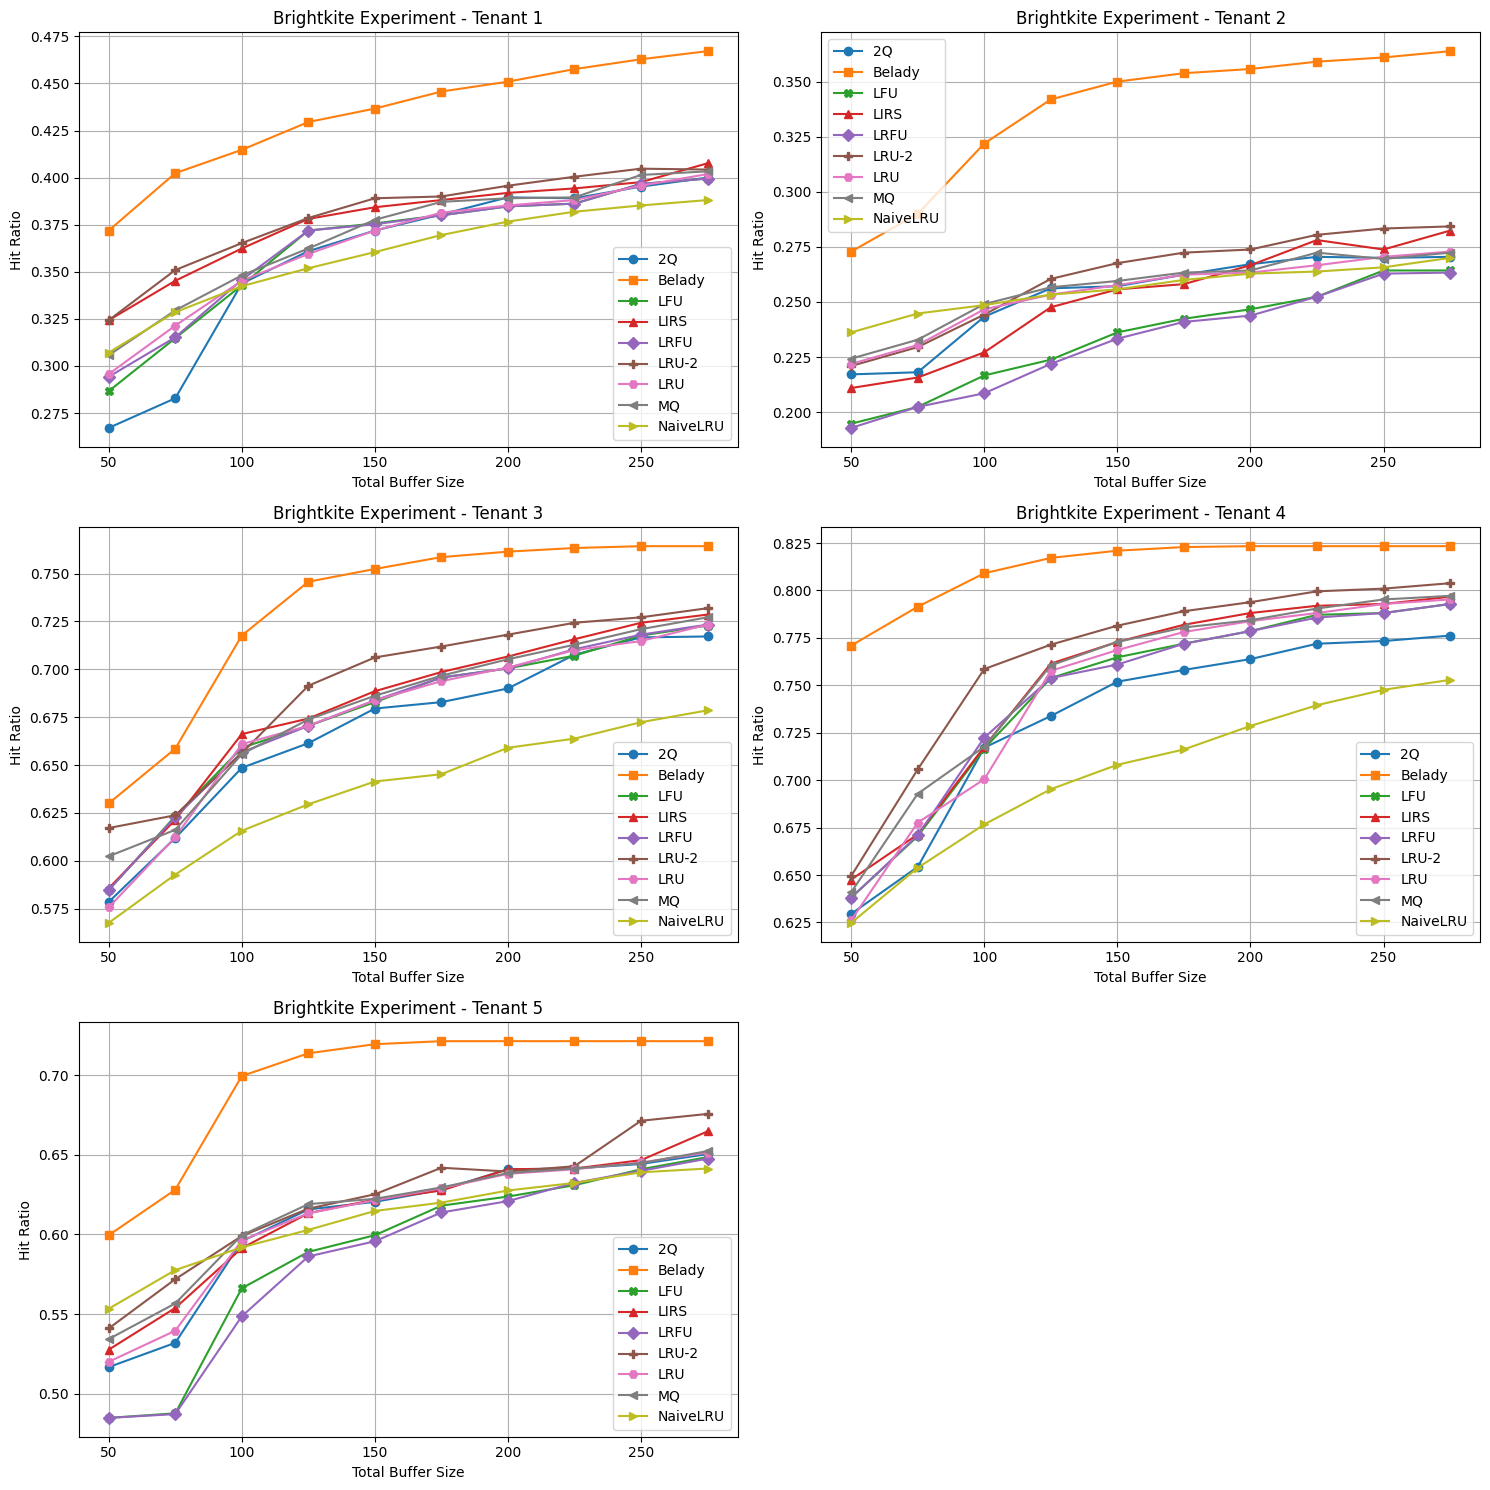

In [9]:
experiments_tenants = [
    ("experiment_1", "tenant_1", "Brightkite Experiment", "Tenant 1"),
    ("experiment_1", "tenant_2", "Brightkite Experiment", "Tenant 2"),
    ("experiment_1", "tenant_3", "Brightkite Experiment", "Tenant 3"),
    ("experiment_1", "tenant_4", "Brightkite Experiment", "Tenant 4"),
    ("experiment_1", "tenant_5", "Brightkite Experiment", "Tenant 5"),
]

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

for i, exp_tenant in enumerate(experiments_tenants):
    plot_hit_ratio_by_buffer_size_subplot(axs[i // 2, i % 2], df, *exp_tenant)

axs[2, 1].axis("off")

plt.tight_layout()
plt.savefig("../../experiments/plots/hit_ratio_per_cache_size_exp_brightkite.png")
plt.show()

##### Plot hit ratio per tenant per buffer size of CitiBike Experiment


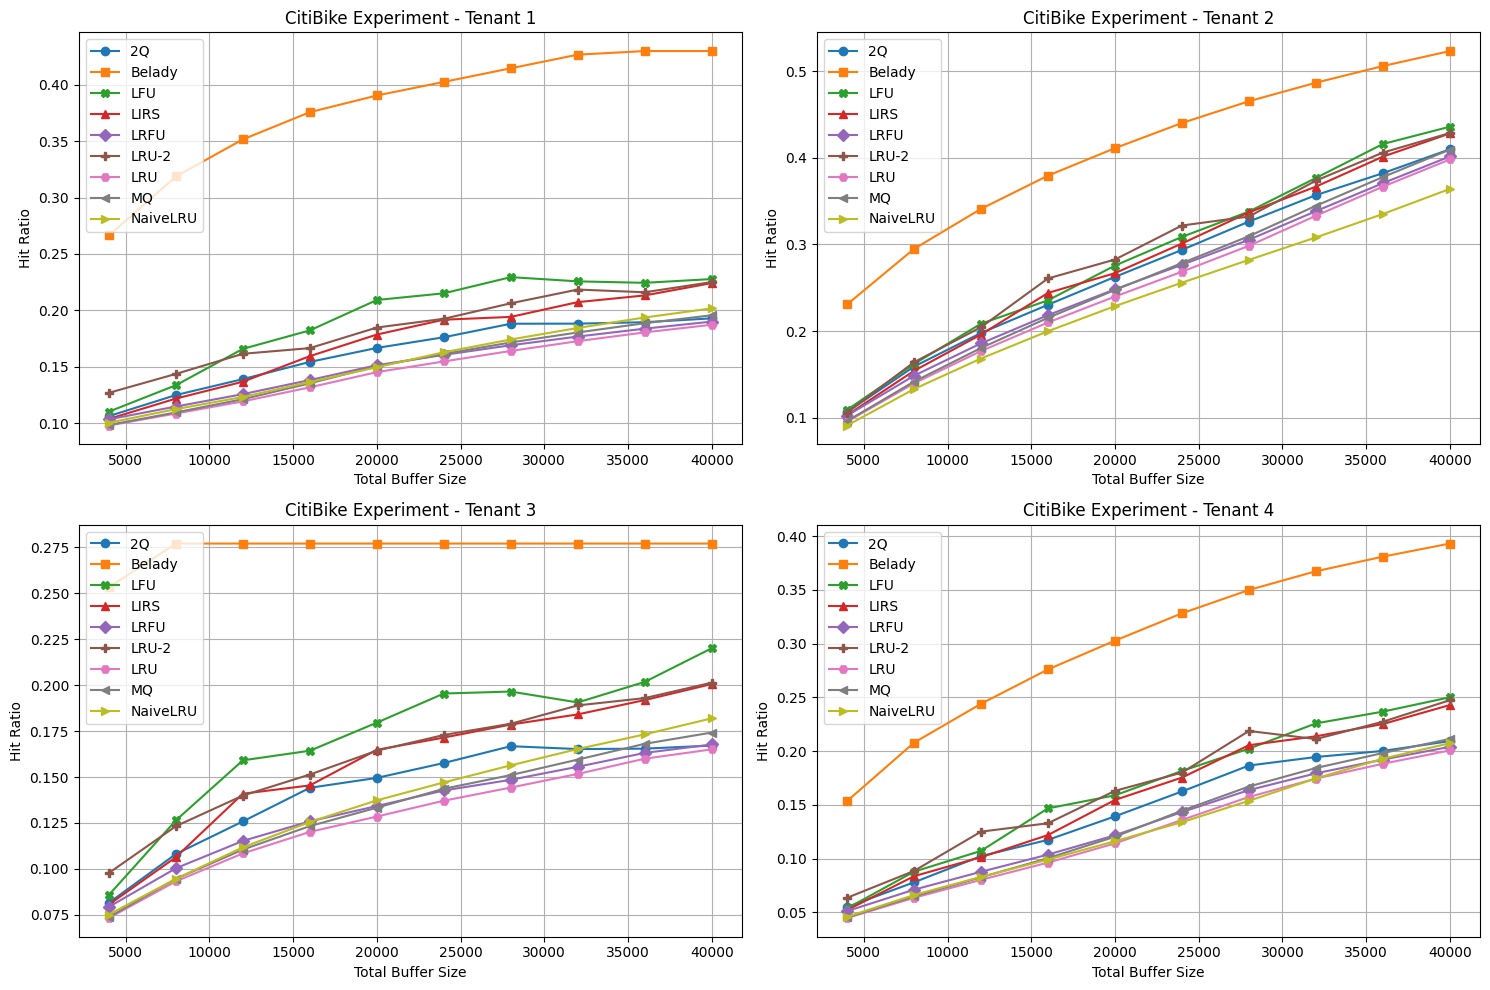

In [10]:
experiments_tenants = [
    ("experiment_2", "tenant_1", "CitiBike Experiment", "Tenant 1"),
    ("experiment_2", "tenant_2", "CitiBike Experiment", "Tenant 2"),
    ("experiment_2", "tenant_3", "CitiBike Experiment", "Tenant 3"),
    ("experiment_2", "tenant_4", "CitiBike Experiment", "Tenant 4"),
]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, exp_tenant in enumerate(experiments_tenants):
    plot_hit_ratio_by_buffer_size_subplot(axs[i // 2, i % 2], df, *exp_tenant)

plt.tight_layout()
plt.savefig("../../experiments/plots/hit_ratio_per_cache_size_exp_citibike.png")
plt.show()